In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

In [13]:
from google.colab import drive
drive.mount('/content/drive')
videopath = 'drive/MyDrive/CACM/Youtube/down.mp4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def download_youtube(youtube_id ='0', start_time=10, duration=5):
  !rm -rf clip*.mp4
  !rm -rf openpose/output/*
  # # download the youtube with the given ID
  # !youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$youtube_id
  # just pick a section where sign language is done
  !ffmpeg -y -loglevel info -ss $start_time -t $duration -i down.mp4 clip.mp4
  # # detect poses on the these 10 seconds
  !rm openpose.avi
  !cd openpose && ./build/examples/openpose/openpose.bin --face --hand --video ../clip.mp4 --write_json ./output_json/ --display 0  --write_video ../clip_openpose.avi
  # convert the result into MP4
  !ffmpeg -y -loglevel info -i clip_openpose.avi clip_openpose.mp4

download_youtube()

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [3]:
!rm openpose/images/video_out*.png
!mkdir openpose/output_images/
!cd openpose && ffmpeg -ss 10 -t 5 -i ../down.mp4 ./output_images/out%05d.png -vf fps=30

rm: cannot remove 'openpose/images/video_out*.png': No such file or directory
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack -

In [4]:
import cv2
import glob
import json
import numpy as np
import os

from matplotlib import pyplot as plt

def load_images(path):
    path = os.path.join(path,'*')
    files = glob.glob(path)
    # We sort the images in alphabetical order to match them
    #  to the annotation files
    files.sort()

    X_raw = []
    for file in files:
        image = cv2.imread(file)
        X_raw.append(np.array(image))

    return X_raw
        
def from_json(path):
    """
    save json data to path
    """
    file = open(path, 'r', encoding='utf-8')
    return json.load(file)

def extract_openpose_anns(ann_json):
  def extract_keypoints(ann_json):
    X = []
    Y = []
    C = []
    id = 0
    while id < len(ann_json):
      if ann_json[id] != 0:
        X.append(ann_json[id])
        Y.append(ann_json[id+1])
        C.append(ann_json[id+2])
        id += 3
      else:
        id += 1
  
    return np.array([X, Y, C])

  kp_pose = extract_keypoints(ann_json['people'][0]['pose_keypoints_2d'])
  kp_face = extract_keypoints(ann_json['people'][0]['face_keypoints_2d'])
  kp_hand_left = extract_keypoints(ann_json['people'][0]['hand_left_keypoints_2d'])
  kp_hand_right = extract_keypoints(ann_json['people'][0]['hand_right_keypoints_2d'])

  pose = {}
  pose['pose'] = kp_pose
  pose['face'] = kp_face
  pose['hand_left'] = kp_hand_left
  pose['hand_right'] = kp_hand_right

  return pose

def extract_pose_annotations(path):
  path = os.path.join(path,'*')
  files = glob.glob(path)
  files.sort()

  Y_raw = []
  for file in files:
    ann_json = from_json(file)
    ann = extract_openpose_anns(ann_json)
    Y_raw.append(ann)

  return Y_raw

In [5]:
X_raw = load_images("openpose/output_images/")
print(len(X_raw))
Y_raw = extract_pose_annotations("openpose/output_json/")
print(len(Y_raw))

150
150


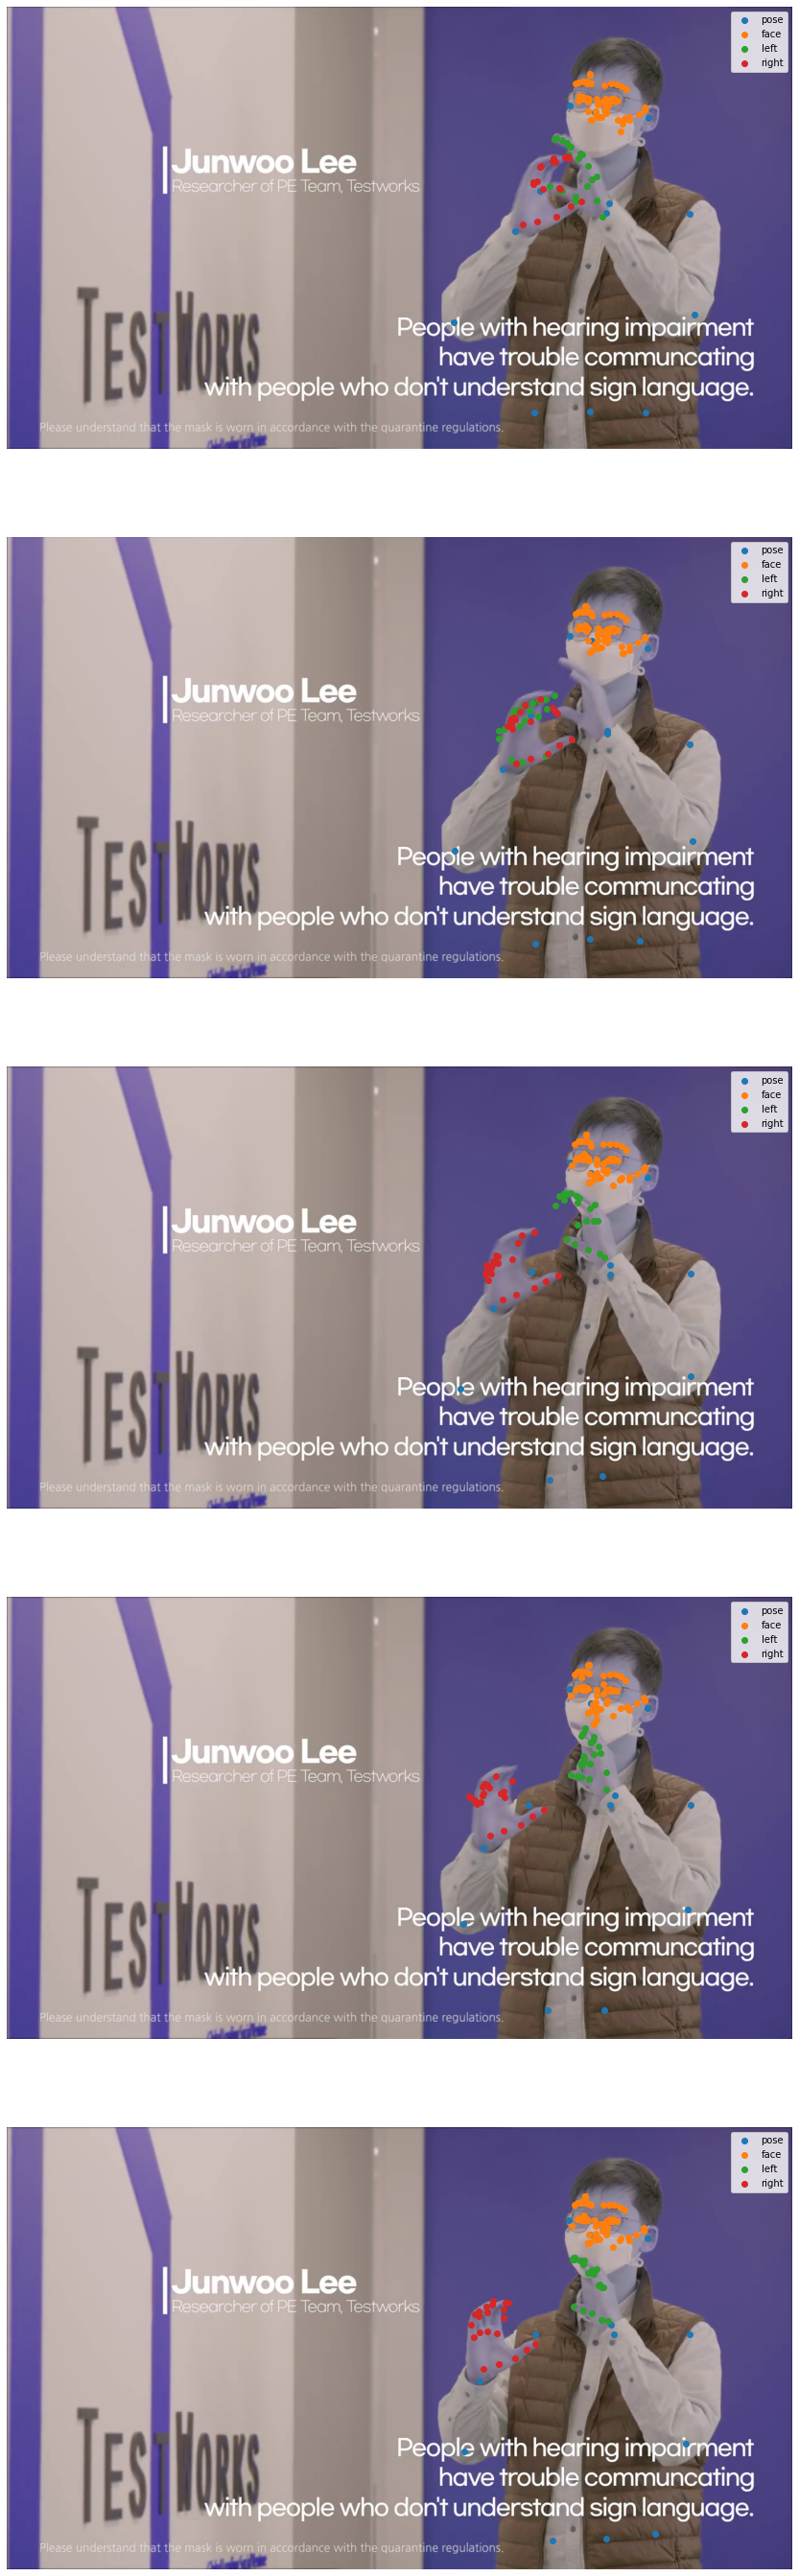

In [6]:
import matplotlib.pyplot as plt

def plot_pose(X, Y, start_id=0, end_id=10):
  # fig, ax = plt.subplots()
  fig = plt.figure(figsize=(100, 100))

  for id in range(start_id, end_id):
    x = X[id]
    y = Y[id]

    ax = fig.add_subplot(10, 1, id - start_id + 1)
    plt.axis('off')

    ax.imshow(x)

    ax.scatter(y['pose'][0], y['pose'][1], label='pose')
    ax.scatter(y['face'][0], y['face'][1], label='face')
    ax.scatter(y['hand_left'][0], y['hand_left'][1], label='left')
    ax.scatter(y['hand_right'][0], y['hand_right'][1], label='right')
    ax.legend()

  # ax.invert_yaxis()

plot_pose(X_raw, Y_raw, start_id=140, end_id=145)

In [42]:
!pip install tf_pose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [43]:
import tf_pose

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2022-07-17 18:14:25,051] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

In [44]:
humans = e.inference(X_raw[12], resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
image_openpose = TfPoseEstimator.draw_humans(X_raw[12], humans, imgcopy=False)

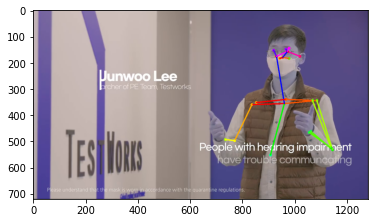

In [45]:
plt.imshow(image_openpose)

In [11]:
humans

[BodyPart:0-(0.73, 0.24) score=0.67 BodyPart:1-(0.75, 0.49) score=0.64 BodyPart:2-(0.65, 0.50) score=0.57 BodyPart:3-(0.60, 0.69) score=0.27 BodyPart:4-(0.57, 0.68) score=0.12 BodyPart:5-(0.85, 0.48) score=0.55 BodyPart:6-(0.89, 0.74) score=0.39 BodyPart:7-(0.83, 0.64) score=0.66 BodyPart:8-(0.71, 0.77) score=0.08 BodyPart:14-(0.72, 0.21) score=0.65 BodyPart:15-(0.76, 0.22) score=0.69 BodyPart:17-(0.80, 0.24) score=0.61]

In [40]:
import re
import numpy as np
str_ = str(humans)

str_float_part = re.compile(r'[(](.*?)[)]', re.S)  
str_float_find = re.findall(str_float_part, str_)

float_value_list_string = ",".join(str_float_find)

float_value_list = re.findall(r"\d+\.?\d*",float_value_list_string)

float_value=list(np.float_(float_value_list))


str_int_part = re.compile(r'[:](.*?)[-]', re.S)  
str_int_find = re.findall(str_int_part, str_)

int_value_list_string = ",".join(str_int_find)
int_value_list = re.findall(r"\d+",int_value_list_string)

int_value=list(np.int_(int_value_list))

zerotosev = np.arange(18) 

diff_list = list(set(zerotosev) - set(int_value))

for i in range(len(diff_list)):
    result = diff_list[i]
    float_value.insert(2*result,0.0)
    float_value.insert(2*result+1,0.0)  
print(float_value)

[0.75, 0.47, 0.67, 0.49, 0.83, 0.48, 0.0, 0.0, 0.0, 0.0, 0.89, 0.73, 0.82, 0.65, 0.76, 0.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.25, 0.74, 0.26, 0.0, 0.0, 0.0, 0.0, 0.76, 0.26, 0.75, 0.21, 0.76, 0.2]


In [41]:
len(float_value)

42

In [37]:
str_

'[BodyPart:1-(0.75, 0.47) score=0.27 BodyPart:2-(0.67, 0.49) score=0.23 BodyPart:5-(0.83, 0.48) score=0.33 BodyPart:6-(0.89, 0.73) score=0.11 BodyPart:7-(0.82, 0.65) score=0.34, BodyPart:0-(0.76, 0.22) score=0.22 BodyPart:1-(0.75, 0.25) score=0.20 BodyPart:2-(0.74, 0.26) score=0.15 BodyPart:5-(0.76, 0.26) score=0.15 BodyPart:14-(0.75, 0.21) score=0.23 BodyPart:15-(0.76, 0.20) score=0.26]'

In [35]:
example = np.array(float_value)

In [36]:
example.shape

(42,)

In [16]:
a = [0.2,0.3]

In [22]:
b = [0.1,0.2]
c = []
c.append(a)
c.append(b)

In [27]:
c = np.zeros([2,2])

In [46]:
c[:,0] = a
c[:,1] = b 

In [51]:
import re
import numpy as np
str_ = '[BodyPart:0-(0.73, 0.24) score=0.67 BodyPart:1-(0.75, 0.49) score=0.64 BodyPart:2-(0.65, 0.50) score=0.57 BodyPart:3-(0.60, 0.69) score=0.27 BodyPart:4-(0.57, 0.68) score=0.12 BodyPart:5-(0.85, 0.48) score=0.55 BodyPart:6-(0.89, 0.74) score=0.39 BodyPart:7-(0.83, 0.64) score=0.66 BodyPart:8-(0.71, 0.77) score=0.08 BodyPart:14-(0.72, 0.21) score=0.65 BodyPart:15-(0.76, 0.22) score=0.69 BodyPart:17-(0.80, 0.24) score=0.61]'
str_float_part = re.compile(r'[(](.*?)[)]', re.S)  
str_float_find = re.findall(str_float_part, str_)
# print('1',str_float_find)
float_value_list_string = ",".join(str_float_find)
float_value_list = re.findall(r"\d+\.?\d*",float_value_list_string)
# print('3',score_list)
float_value=list(np.float_(float_value_list))
# print(float_value)

str_int_part = re.compile(r'[:](.*?)[-]', re.S)  
str_int_find = re.findall(str_int_part, str_)
int_value_list_string = ",".join(str_int_find)
int_value_list = re.findall(r"\d+",int_value_list_string)
int_value=list(np.int_(int_value_list))
# print(int_value)
zerotosev = np.arange(18) 

diff_list = list(set(zerotosev) - set(int_value))
# print(diff_list)
for i in range(len(diff_list)):
    result = diff_list[i]
    float_value.insert(2*result,0.0)
    float_value.insert(2*result+1,0.0)  
# print(float_value)
# print(len(float_value))

str_score_part = re.compile(r'(?<=score=)\d+\.?\d*')
str_score_find = re.findall(str_score_part, str_)
# print('1',str_score_find)
score_value_list_string = ",".join(str_score_find)
score_value_list = re.findall(r"\d+\.?\d*",score_value_list_string)

score_value=list(np.float_(score_value_list))
# print(score_value)

for i in range(len(diff_list)):
    result = diff_list[i]
    score_value.insert(result,0.0)
    
print(score_value)  
print(len(score_value)) 

[0.67, 0.64, 0.57, 0.27, 0.12, 0.55, 0.39, 0.66, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.65, 0.69, 0.0, 0.61]
18


In [31]:
# c.

(2, 2)

In [53]:
import re
import numpy as np
humans_frames = np.zeros([150,36])
confidence_frames = np.zeros([150,18])
for i in range(150):
  humans = e.inference(X_raw[i], resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
  # image_openpose = TfPoseEstimator.draw_humans(X_raw[i], humans, imgcopy=False)
  str_ = str(humans)

  str_float_part = re.compile(r'[(](.*?)[)]', re.S)  
  str_float_find = re.findall(str_float_part, str_)
  # print('1',str_float_find)
  float_value_list_string = ",".join(str_float_find)
  float_value_list = re.findall(r"\d+\.?\d*",float_value_list_string)
  # print('3',score_list)
  float_value=list(np.float_(float_value_list))
  # print(float_value)

  str_int_part = re.compile(r'[:](.*?)[-]', re.S)  
  str_int_find = re.findall(str_int_part, str_)
  int_value_list_string = ",".join(str_int_find)
  int_value_list = re.findall(r"\d+",int_value_list_string)
  int_value=list(np.int_(int_value_list))
  # print(int_value)
  zerotosev = np.arange(18) 

  diff_list = list(set(zerotosev) - set(int_value))
  # print(diff_list)
  for i in range(len(diff_list)):
      result = diff_list[i]
      float_value.insert(2*result,0.0)
      float_value.insert(2*result+1,0.0)  
  # print(float_value)
  # print(len(float_value))

  str_score_part = re.compile(r'(?<=score=)\d+\.?\d*')
  str_score_find = re.findall(str_score_part, str_)
  # print('1',str_score_find)
  score_value_list_string = ",".join(str_score_find)
  score_value_list = re.findall(r"\d+\.?\d*",score_value_list_string)

  score_value=list(np.float_(score_value_list))
  print(score_value)

  for j in range(len(diff_list)):
      result = diff_list[j]
      score_value.insert(result,0.0)
  humans_frames[i,:] = float_value 
  confidence_frames[i,:] = score_value
  

[0.38, 0.64, 0.56, 0.65, 0.72, 0.55, 0.66, 0.69, 0.17, 0.27, 0.49, 0.62, 0.18, 0.59]
[0.4, 0.58, 0.48, 0.48, 0.51, 0.56, 0.61, 0.72, 0.1, 0.26, 0.5, 0.65, 0.13, 0.6]
[0.42, 0.6, 0.51, 0.48, 0.36, 0.55, 0.64, 0.74, 0.14, 0.22, 0.53, 0.65, 0.6]
[0.5, 0.66, 0.6, 0.34, 0.3, 0.55, 0.59, 0.72, 0.1, 0.19, 0.56, 0.69, 0.61]
[0.5, 0.7, 0.61, 0.4, 0.48, 0.57, 0.64, 0.71, 0.07, 0.17, 0.49, 0.66, 0.59]
[0.5, 0.64, 0.6, 0.51, 0.61, 0.57, 0.63, 0.76, 0.1, 0.13, 0.46, 0.62, 0.58]
[0.61, 0.64, 0.6, 0.36, 0.46, 0.51, 0.6, 0.76, 0.09, 0.12, 0.52, 0.68, 0.6]
[0.61, 0.63, 0.59, 0.21, 0.31, 0.53, 0.59, 0.8, 0.11, 0.57, 0.69, 0.56]
[0.54, 0.66, 0.6, 0.29, 0.15, 0.56, 0.56, 0.76, 0.59, 0.67, 0.52]
[0.59, 0.61, 0.57, 0.25, 0.13, 0.54, 0.4, 0.75, 0.62, 0.69, 0.53]
[0.63, 0.61, 0.57, 0.27, 0.11, 0.55, 0.44, 0.71, 0.61, 0.71, 0.57]
[0.67, 0.63, 0.58, 0.26, 0.09, 0.56, 0.37, 0.62, 0.09, 0.61, 0.73, 0.6]
[]
[0.68, 0.62, 0.58, 0.24, 0.11, 0.53, 0.39, 0.68, 0.09, 0.69, 0.67, 0.59]
[0.62, 0.64, 0.58, 0.23, 0.13, 0.53

ValueError: ignored

In [4]:
humans = 'BodyPart:0-(0.73, 0.24) score=0.63 BodyPart:1-(0.75, 0.49) score=0.61 BodyPart:2-(0.65, 0.50) score=0.57 BodyPart:3-(0.61, 0.68) score=0.27 BodyPart:4-(0.61, 0.71) score=0.11 BodyPart:5-(0.85, 0.48) score=0.55 BodyPart:6-(0.89, 0.76) score=0.44 BodyPart:7-(0.82, 0.64) score=0.71 BodyPart:14-(0.72, 0.21) score=0.61 BodyPart:15-(0.76, 0.22) score=0.71 BodyPart:17-(0.80, 0.24) score=0.57'
string = humans
p1 = re.compile(r'[(](.*?)[)]', re.S)  
p2 = re.findall(p1, string)
print(type(p2))
p3 = np.asarray(p2)
print(p3)

# humans_frames.append(humans)

<class 'list'>
['0.73, 0.24' '0.75, 0.49' '0.65, 0.50' '0.61, 0.68' '0.61, 0.71'
 '0.85, 0.48' '0.89, 0.76' '0.82, 0.64' '0.72, 0.21' '0.76, 0.22'
 '0.80, 0.24']


In [5]:
p3[0]

'0.73, 0.24'

In [60]:
humans_frames[12]

[BodyPart:1-(0.75, 0.47) score=0.27 BodyPart:2-(0.67, 0.49) score=0.23 BodyPart:5-(0.83, 0.48) score=0.33 BodyPart:6-(0.89, 0.73) score=0.11 BodyPart:7-(0.82, 0.65) score=0.34,
 BodyPart:0-(0.76, 0.22) score=0.22 BodyPart:1-(0.75, 0.25) score=0.20 BodyPart:2-(0.74, 0.26) score=0.15 BodyPart:5-(0.76, 0.26) score=0.15 BodyPart:14-(0.75, 0.21) score=0.23 BodyPart:15-(0.76, 0.20) score=0.26]